In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

# Define the dataset with all arrays of the same length
data = {
    "MLB Team": [
        "Arizona Diamondbacks", "Atlanta Braves", "Baltimore Orioles", "Boston Red Sox", "Chicago Cubs",
        "Chicago White Sox", "Cincinnati Reds", "Cleveland Guardians", "Colorado Rockies", "Detroit Tigers",
        "Houston Astros", "Kansas City Royals", "Los Angeles Angels", "Los Angeles Dodgers", "Miami Marlins",
        "Milwaukee Brewers", "Minnesota Twins", "New York Mets", "New York Yankees", "Oakland Athletics",
        "Philadelphia Phillies", "Pittsburgh Pirates", "San Diego Padres", "San Francisco Giants",
        "Seattle Mariners", "St. Louis Cardinals", "Tampa Bay Rays", "Texas Rangers", "Toronto Blue Jays",
        "Washington Nationals"
    ],
    "City": [
        "Phoenix, AZ", "Atlanta, GA", "Baltimore, MD", "Boston, MA", "Chicago, IL", "Chicago, IL",
        "Cincinnati, OH", "Cleveland, OH", "Denver, CO", "Detroit, MI", "Houston, TX", "Kansas City, MO",
        "Anaheim, CA", "Los Angeles, CA", "Miami, FL", "Milwaukee, WI", "Minneapolis, MN", "New York, NY",
        "New York, NY", "Oakland, CA", "Philadelphia, PA", "Pittsburgh, PA", "San Diego, CA", "San Francisco, CA",
        "Seattle, WA", "St. Louis, MO", "St. Petersburg, FL", "Arlinton, TX", "Toronto, ON", "Washington, D.C."
    ],
    "Team Revenue (in millions)":[
        314000000, 473000000, 328000000, 500000000, 506000000, 288000000, 315000000, 315000000, 313000000, 306000000,
        445000000, 302000000, 388000000, 549000000, 295000000, 320000000, 342000000, 393000000, 679000000, 241000000,
        458000000, 309000000, 345000000, 443000000, 396000000, 372000000, 301000000, 425000000, 328000000, 355000000
    ],
    "City Population Estimate": [
        1608139, 498715, 576498, 654776, 2746388, 2746388, 309317, 372624, 749103, 632464, 2304580,
        508090, 349366, 3898747, 442241, 577222, 429606, 8336817, 8336817, 440646, 1603797, 302971,
        1386932, 873965, 737015, 301578, 258308, 8100037, 2794356, 689545
    ],
    "Median Household Income (City)": [
        79664, 85880, 59579, 96931, 74747, 74747, 54314, 39041, 94157, 38080, 60440, 65225,
        84872, 76244, 68635, 52992, 81001, 76577, 76577, 96828, 60302, 66219, 105780, 136689,
        120608, 56245, 71743, 69208, 0, 108210
    ],
    "Metropolitan Area": [
        "Phoenix-Mesa-Chandler, AZ", "Atlanta-Sandy Springs-Roswell, GA", "Baltimore-Columbia-Towson, MD",
        "Boston-Cambridge-Newton, MA-NH", "Chicago-Naperville-Elgin, IL-IN-WI", "Chicago-Naperville-Elgin, IL-IN-WI",
        "Cincinnati, OH-KY-IN", "Cleveland-Elyria, OH", "Denver-Aurora-Lakewood, CO", "Detroit-Warren-Dearborn, MI",
        "Houston-The Woodlands-Sugar Land, TX", "Kansas City, MO-KS", "Los Angeles-Long Beach-Anaheim, CA",
        "Los Angeles-Long Beach-Anaheim, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Milwaukee-Waukesha, WI",
        "Minneapolis-St. Paul-Bloomington, MN-WI", "New York-Newark-Jersey City, NY-NJ-PA",
        "New York-Newark-Jersey City, NY-NJ-PA", "San Francisco-Oakland-Berkeley, CA",
        "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD", "Pittsburgh, PA", "San Diego-Chula Vista-Carlsbad, CA",
        "San Francisco-Oakland-Berkeley, CA", "Seattle-Tacoma-Bellevue, WA", "St. Louis, MO-IL",
        "Tampa-St. Petersburg-Clearwater, FL", "Dallas-Fort Worth-Arlington, TX", "Toronto, Canada",
        "Washington-Arlington-Alexandria, DC-VA-MD-WV"
    ],
    "Metropolitan Population Estimate": [
        5070110, 6307261, 2834316, 4919179, 9262825, 9262825, 2271479, 2158932, 3005131, 4342304,
        7510253, 2221343, 12799100, 12799100, 6183199, 1560424, 3712020, 19498249, 19498249, 4566961,
        6246160, 2422725, 3269973, 4566961, 4044837, 2796999, 3342963, 8100037, 6471850, 6304975
    ],
    "Median Household Income (Metro Area)": [
        85700, 86505, 86443, 110697, 87071, 87071, 77844, 66481, 103055, 72574, 79463, 79842,
        91960, 91960, 76271, 77006, 95102, 95220, 95220, 127792, 86867, 76615, 103674, 127792,
        110744, 78224, 72743, 86860, 0, 121469
    ],
    "NFL Team(s)": [
        "Arizona Cardinals", "Atlanta Falcons", "Baltimore Ravens", "New England Patriots", "Chicago Bears",
        "Chicago Bears", "Cincinnati Bengals", "Cleveland Browns", "Denver Broncos", "Detroit Lions",
        "Houston Texans", "Kansas City Chiefs", "Los Angeles Rams, Los Angeles Chargers", "Los Angeles Rams, Los Angeles Chargers",
        "Miami Dolphins", "0", "Minnesota Vikings", "New York Giants, New York Jets", "New York Giants, New York Jets", "0",
        "Philadelphia Eagles", "Pittsburgh Steelers", "0", "San Francisco 49ers", "Seattle Seahawks", "0", "Tampa Bay Buccaneers",
        "Dallas Cowboys", "0", "Washington Commanders"
    ],
    "NBA Team(s)": [
        "Phoenix Suns", "Atlanta Hawks", "0", "Boston Celtics", "Chicago Bulls", "Chicago Bulls", "0", "Cleveland Cavaliers",
        "Denver Nuggets", "Detroit Pistons", "Houston Rockets", "0", "Los Angeles Lakers, Los Angeles Clippers", "Los Angeles Lakers, Los Angeles Clippers",
        "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New York Knicks, Brooklyn Nets", "New York Knicks, Brooklyn Nets", "0",
        "Philadelphia 76ers", "0", "0", "Golden State Warriors", "0", "0", "0", "Dallas Mavericks", "Toronto Raptors", "Washington Wizards"
    ],
    "NHL Team(s)": [
        "Arizona Coyotes", "0", "0", "Boston Bruins", "Chicago Blackhawks", "Chicago Blackhawks", "0", "0", "Colorado Avalanche",
        "Detroit Red Wings", "0", "0", "Los Angeles Kings, Anaheim Ducks", "Los Angeles Kings, Anaheim Ducks", "Florida Panthers",
        "0", "Minnesota Wild", "New York Rangers, New York Islanders, New Jersey Devils", "New York Rangers, New York Islanders, New Jersey Devils", "0",
        "Philadelphia Flyers", "Pittsburgh Penguins", "0", "0", "Seattle Kraken", "St. Louis Blues", "Tampa Bay Lightning", "Dallas Stars",
        "Toronto Maple Leafs", "Washington Capitals"
    ],
    "MLS Team(s)": [
        "Phoenix Rising FC", "Atlanta United FC", "0", "New England Revolution", "Chicago Fire FC", "Chicago Fire FC", "FC Cincinnati",
        "0", "Colorado Rapids", "0", "Houston Dynamo FC", "Sporting Kansas City", "Los Angeles Galaxy, Los Angeles FC", "Los Angeles Galaxy, Los Angeles FC",
        "Inter Miami CF", "0", "Minnesota United FC", "New York City FC, New York Red Bulls",
        "New York City FC, New York Red Bulls", "0", "Philadelphia Union", "0", "San Diego Loyal SC",
        "San Jose Earthquakes", "Seattle Sounders FC", "St. Louis City SC", "0", "FC Dallas", "Toronto FC", "D.C. United"
    ],
    "MiLB Team(s)": [
        "None",
        "Gwinnett Stripers (Triple-A), Rome Braves (High-A)",
        "Bowie Baysox (Double-A), Aberdeen IronBirds (High-A)",
        "Worcester Red Sox (Triple-A)",
        "Chicago Dogs (Independent), Kane County Cougars (Independent)",
        "Chicago Dogs (Independent), Kane County Cougars (Independent)",
        "Dayton Dragons (High-A), Florence Y'alls (Independent)",
        "Akron RubberDucks (Double-A), Lake County Captains (High-A)",
        "Rocky Mountain Vibes (Independent)",
        "Toledo Mud Hens (Triple-A), West Michigan Whitecaps (High-A)",
        "Sugar Land Space Cowboys (Triple-A)",
        "Kansas City Monarchs (Independent)",
        "Rancho Cucamonga Quakes (Single-A), Inland Empire 66ers (Single-A)",
        "Rancho Cucamonga Quakes (Single-A), Inland Empire 66ers (Single-A)",
        "Jupiter Hammerheads (Single-A), Palm Beach Cardinals (Single-A)",
        "Wisconsin Timber Rattlers (High-A), Milwaukee Milkmen (Independent)",
        "St. Paul Saints (Triple-A)",
        "Brooklyn Cyclones (High-A), Staten Island FerryHawks (Independent), Long Island Ducks (Independent), Somerset Patriots (Double-A)",
        "Brooklyn Cyclones (High-A), Staten Island FerryHawks (Independent), Long Island Ducks (Independent), Somerset Patriots (Double-A)",
        "None",
        "Reading Fightin Phils (Double-A), Lehigh Valley IronPigs (Triple-A), Wilmington Blue Rocks (High-A), Trenton Thunder (Independent)",
        "Altoona Curve (Double-A), Washington Wild Things (Independent)",
        "Lake Elsinore Storm (Single-A)",
        "San Jose Giants (Single-A)",
        "Tacoma Rainiers (Triple-A), Everett AquaSox (High-A)",
        "Springfield Cardinals (Double-A), Gateway Grizzlies (Independent)",
        "Clearwater Threshers (Single-A), Dunedin Blue Jays (Single-A), Tampa Tarpons (Single-A), Bradenton Marauders (Single-A), Lakeland Flying Tigers (Single-A)",
        "Frisco RoughRiders (Double-A), Cleburne Railroaders (Independent)",
        "Buffalo Bisons (Triple-A)",
        "Fredericksburg Nationals (Single-A), Bowie Baysox (Double-A), Wilmington Blue Rocks (High-A)"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Add columns to calculate totals for each MiLB level
df["AAA"] = df["MiLB Team(s)"].apply(lambda x: x.count("Triple-A"))
df["AA"] = df["MiLB Team(s)"].apply(lambda x: x.count("Double-A"))
df["A"] = df["MiLB Team(s)"].apply(lambda x: x.count("Single-A") + x.count("High-A"))




# Define the league columns
league_columns = {
    "NFL Team(s)": [
        "Arizona Cardinals", "Atlanta Falcons", "Baltimore Ravens", "New England Patriots", "Chicago Bears",
        "Chicago Bears", "Cincinnati Bengals", "Cleveland Browns", "Denver Broncos", "Detroit Lions",
        "Houston Texans", "Kansas City Chiefs", "Los Angeles Rams, Los Angeles Chargers", "Los Angeles Rams, Los Angeles Chargers",
        "Miami Dolphins", "0", "Minnesota Vikings", "New York Giants, New York Jets", "New York Giants, New York Jets", "0",
        "Philadelphia Eagles", "Pittsburgh Steelers", "0", "San Francisco 49ers", "Seattle Seahawks", "0", "Tampa Bay Buccaneers",
        "Dallas Cowboys", "0", "Washington Commanders"
    ],
    "NBA Team(s)": [
        "Phoenix Suns", "Atlanta Hawks", "0", "Boston Celtics", "Chicago Bulls", "Chicago Bulls", "0", "Cleveland Cavaliers",
        "Denver Nuggets", "Detroit Pistons", "Houston Rockets", "0", "Los Angeles Lakers, Los Angeles Clippers", "Los Angeles Lakers, Los Angeles Clippers",
        "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New York Knicks, Brooklyn Nets", "New York Knicks, Brooklyn Nets", "0",
        "Philadelphia 76ers", "0", "0", "Golden State Warriors", "0", "0", "0", "Dallas Mavericks", "Toronto Raptors", "Washington Wizards"
    ],
    "NHL Team(s)": [
        "Arizona Coyotes", "0", "0", "Boston Bruins", "Chicago Blackhawks", "Chicago Blackhawks", "0", "0", "Colorado Avalanche",
        "Detroit Red Wings", "0", "0", "Los Angeles Kings, Anaheim Ducks", "Los Angeles Kings, Anaheim Ducks", "Florida Panthers",
        "0", "Minnesota Wild", "New York Rangers, New York Islanders, New Jersey Devils", "New York Rangers, New York Islanders, New Jersey Devils", "0",
        "Philadelphia Flyers", "Pittsburgh Penguins", "0", "0", "Seattle Kraken", "St. Louis Blues", "Tampa Bay Lightning", "Dallas Stars",
        "Toronto Maple Leafs", "Washington Capitals"
    ],
    "MLS Team(s)": [
        "Phoenix Rising FC", "Atlanta United FC", "0", "New England Revolution", "Chicago Fire FC", "Chicago Fire FC", "FC Cincinnati",
        "0", "Colorado Rapids", "0", "Houston Dynamo FC", "Sporting Kansas City", "Los Angeles Galaxy, Los Angeles FC", "Los Angeles Galaxy, Los Angeles FC",
        "Inter Miami CF", "0", "Minnesota United FC", "New York City FC, New York Red Bulls",
        "New York City FC, New York Red Bulls", "0", "Philadelphia Union", "0", "San Diego Loyal SC",
        "San Jose Earthquakes", "Seattle Sounders FC", "St. Louis City SC", "0", "FC Dallas", "Toronto FC", "D.C. United"
    ]
}

# Add columns to count the number of teams in each league
for league, teams in league_columns.items():
    df[league.split(" ")[0] + " Count"] = [team.count(",") + 1 if team != "0" else 0 for team in teams]




# Save the updated DataFrame to a CSV file
file_path_csv = "mlb_cities_with_pro_and_minor_leagues.csv"
df.to_csv(file_path_csv, index=False)

# Save to an Excel file
file_path_excel = "mlb_cities_with_pro_and_minor_leagues.xlsx"
df.to_excel(file_path_excel, index=False)

print(f"Data saved to CSV: {file_path_csv}")
print(f"Data saved to Excel: {file_path_excel}")


Data saved to CSV: mlb_cities_with_pro_and_minor_leagues.csv
Data saved to Excel: mlb_cities_with_pro_and_minor_leagues.xlsx


In [2]:
dfN= pd.read_csv('mlb_cities_with_pro_and_minor_leagues.csv')

In [3]:
dfN.head(7)

,MLB Team,City,Team Revenue (in millions),City Population Estimate,Median Household Income (City),Metropolitan Area,Metropolitan Population Estimate,Median Household Income (Metro Area),NFL Team(s),NBA Team(s),NHL Team(s),MLS Team(s),MiLB Team(s),AAA,AA,A,NFL Count,NBA Count,NHL Count,MLS Count
0,Arizona Diamondbacks,"Phoenix, AZ",314000000,1608139,79664,"Phoenix-Mesa-Chandler, AZ",5070110,85700,Arizona Cardinals,Phoenix Suns,Arizona Coyotes,Phoenix Rising FC,None,0,0,0,1,1,1,1
1,Atlanta Braves,"Atlanta, GA",473000000,498715,85880,"Atlanta-Sandy Springs-Roswell, GA",6307261,86505,Atlanta Falcons,Atlanta Hawks,0,Atlanta United FC,"Gwinnett Stripers (Triple-A), Rome Braves (Hig...",1,0,1,1,1,0,1
2,Baltimore Orioles,"Baltimore, MD",328000000,576498,59579,"Baltimore-Columbia-Towson, MD",2834316,86443,Baltimore Ravens,0,0,0,"Bowie Baysox (Double-A), Aberdeen IronBirds (H...",0,1,1,1,0,0,0
3,Boston Red Sox,"Boston, MA",500000000,654776,96931,"Boston-Cambridge-Newton, MA-NH",4919179,110697,New England Patriots,Boston Celtics,Boston Bruins,New England Revolution,Worcester Red Sox (Triple-A),1,0,0,1,1,1,1
4,Chicago Cubs,"Chicago, IL",506000000,2746388,74747,"Chicago-Naperville-Elgin, IL-IN-WI",9262825,87071,Chicago Bears,Chicago Bulls,Chicago Blackhawks,Chicago Fire FC,"Chicago Dogs (Independent), Kane County Cougar...",0,0,0,1,1,1,1
5,Chicago White Sox,"Chicago, IL",288000000,2746388,74747,"Chicago-Naperville-Elgin, IL-IN-WI",9262825,87071,Chicago Bears,Chicago Bulls,Chicago Blackhawks,Chicago Fire FC,"Chicago Dogs (Independent), Kane County Cougar...",0,0,0,1,1,1,1
6,Cincinnati Reds,"Cincinnati, OH",315000000,309317,54314,"Cincinnati, OH-KY-IN",2271479,77844,Cincinnati Bengals,0,0,FC Cincinnati,"Dayton Dragons (High-A), Florence Y'alls (Inde...",0,0,1,1,0,0,1


In [4]:
# Load the MLB dataset

# Add a new column 'MLB Count' based on the number of teams in the 'MLB Team(s)' column
dfN["MLB Count"] = dfN["MLB Team"].apply(lambda x: len(str(x).split(", ")) if pd.notna(x) else 0)

#

In [5]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   MLB Team                              30 non-null     object
 1   City                                  30 non-null     object
 2   Team Revenue (in millions)            30 non-null     int64 
 3   City Population Estimate              30 non-null     int64 
 4   Median Household Income (City)        30 non-null     int64 
 5   Metropolitan Area                     30 non-null     object
 6   Metropolitan Population Estimate      30 non-null     int64 
 7   Median Household Income (Metro Area)  30 non-null     int64 
 8   NFL Team(s)                           30 non-null     object
 9   NBA Team(s)                           30 non-null     object
 10  NHL Team(s)                           30 non-null     object
 11  MLS Team(s)                       

In [6]:
dfN.head()

,MLB Team,City,Team Revenue (in millions),City Population Estimate,Median Household Income (City),Metropolitan Area,Metropolitan Population Estimate,Median Household Income (Metro Area),NFL Team(s),NBA Team(s),...,MLS Team(s),MiLB Team(s),AAA,AA,A,NFL Count,NBA Count,NHL Count,MLS Count,MLB Count
0,Arizona Diamondbacks,"Phoenix, AZ",314000000,1608139,79664,"Phoenix-Mesa-Chandler, AZ",5070110,85700,Arizona Cardinals,Phoenix Suns,...,Phoenix Rising FC,None,0,0,0,1,1,1,1,1
1,Atlanta Braves,"Atlanta, GA",473000000,498715,85880,"Atlanta-Sandy Springs-Roswell, GA",6307261,86505,Atlanta Falcons,Atlanta Hawks,...,Atlanta United FC,"Gwinnett Stripers (Triple-A), Rome Braves (Hig...",1,0,1,1,1,0,1,1
2,Baltimore Orioles,"Baltimore, MD",328000000,576498,59579,"Baltimore-Columbia-Towson, MD",2834316,86443,Baltimore Ravens,0,...,0,"Bowie Baysox (Double-A), Aberdeen IronBirds (H...",0,1,1,1,0,0,0,1
3,Boston Red Sox,"Boston, MA",500000000,654776,96931,"Boston-Cambridge-Newton, MA-NH",4919179,110697,New England Patriots,Boston Celtics,...,New England Revolution,Worcester Red Sox (Triple-A),1,0,0,1,1,1,1,1
4,Chicago Cubs,"Chicago, IL",506000000,2746388,74747,"Chicago-Naperville-Elgin, IL-IN-WI",9262825,87071,Chicago Bears,Chicago Bulls,...,Chicago Fire FC,"Chicago Dogs (Independent), Kane County Cougar...",0,0,0,1,1,1,1,1


In [7]:
# Remove all rows corresponding to the Toronto Blue Jays from the dataset
dfN = dfN[dfN['MLB Team'] != "Toronto Blue Jays"]

# Confirm the rows were removed by checking if "Toronto Blue Jays" exists
"Toronto Blue Jays" in dfN['MLB Team'].unique()


False

In [8]:
dfN["NFL Count"].unique()

array([1, 2, 0], dtype=int64)

In [9]:
dfN["NBA Count"].unique()

array([1, 0, 2], dtype=int64)

In [10]:
dfN["NHL Count"].unique()

array([1, 0, 2, 3], dtype=int64)

In [11]:
dfN["MLS Count"].unique()

array([1, 0, 2], dtype=int64)

In [12]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   MLB Team                              29 non-null     object
 1   City                                  29 non-null     object
 2   Team Revenue (in millions)            29 non-null     int64 
 3   City Population Estimate              29 non-null     int64 
 4   Median Household Income (City)        29 non-null     int64 
 5   Metropolitan Area                     29 non-null     object
 6   Metropolitan Population Estimate      29 non-null     int64 
 7   Median Household Income (Metro Area)  29 non-null     int64 
 8   NFL Team(s)                           29 non-null     object
 9   NBA Team(s)                           29 non-null     object
 10  NHL Team(s)                           29 non-null     object
 11  MLS Team(s)                       

In [13]:
dfN['total_Pro_league'] = dfN['NFL Count'] + dfN['NBA Count']+ dfN['NHL Count'] + dfN['MLS Count']+ dfN["MLB Count"] #
# new_column_df = dfN[['total_Pro_league']].reset_index(drop=True)
# dfN = pd.concat([dfN.reset_index(drop=True), new_column_df], axis=1)


In [14]:
dfN.head()

,MLB Team,City,Team Revenue (in millions),City Population Estimate,Median Household Income (City),Metropolitan Area,Metropolitan Population Estimate,Median Household Income (Metro Area),NFL Team(s),NBA Team(s),...,MiLB Team(s),AAA,AA,A,NFL Count,NBA Count,NHL Count,MLS Count,MLB Count,total_Pro_league
0,Arizona Diamondbacks,"Phoenix, AZ",314000000,1608139,79664,"Phoenix-Mesa-Chandler, AZ",5070110,85700,Arizona Cardinals,Phoenix Suns,...,None,0,0,0,1,1,1,1,1,5
1,Atlanta Braves,"Atlanta, GA",473000000,498715,85880,"Atlanta-Sandy Springs-Roswell, GA",6307261,86505,Atlanta Falcons,Atlanta Hawks,...,"Gwinnett Stripers (Triple-A), Rome Braves (Hig...",1,0,1,1,1,0,1,1,4
2,Baltimore Orioles,"Baltimore, MD",328000000,576498,59579,"Baltimore-Columbia-Towson, MD",2834316,86443,Baltimore Ravens,0,...,"Bowie Baysox (Double-A), Aberdeen IronBirds (H...",0,1,1,1,0,0,0,1,2
3,Boston Red Sox,"Boston, MA",500000000,654776,96931,"Boston-Cambridge-Newton, MA-NH",4919179,110697,New England Patriots,Boston Celtics,...,Worcester Red Sox (Triple-A),1,0,0,1,1,1,1,1,5
4,Chicago Cubs,"Chicago, IL",506000000,2746388,74747,"Chicago-Naperville-Elgin, IL-IN-WI",9262825,87071,Chicago Bears,Chicago Bulls,...,"Chicago Dogs (Independent), Kane County Cougar...",0,0,0,1,1,1,1,1,5


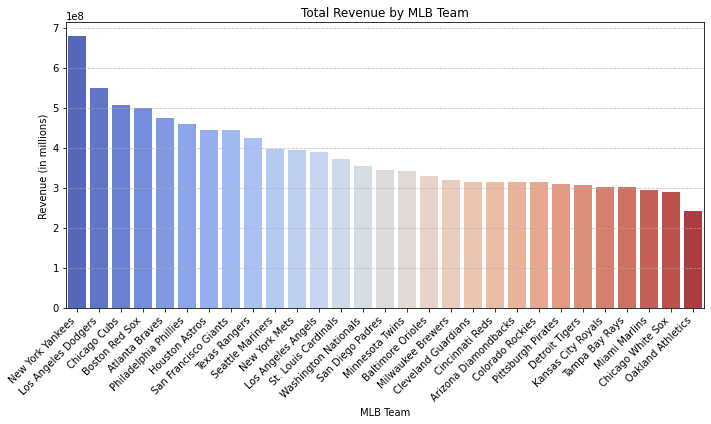

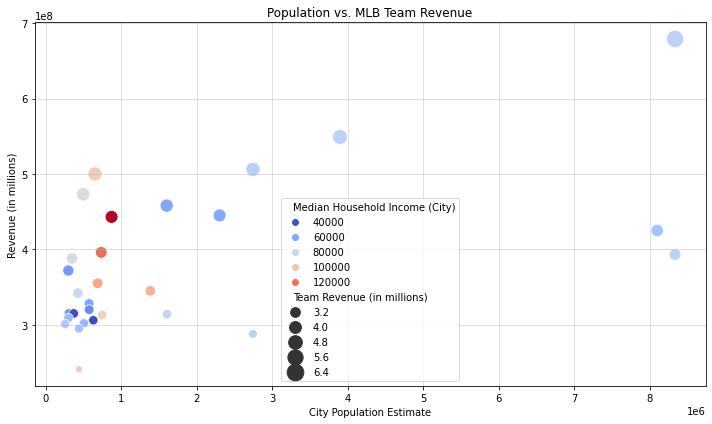

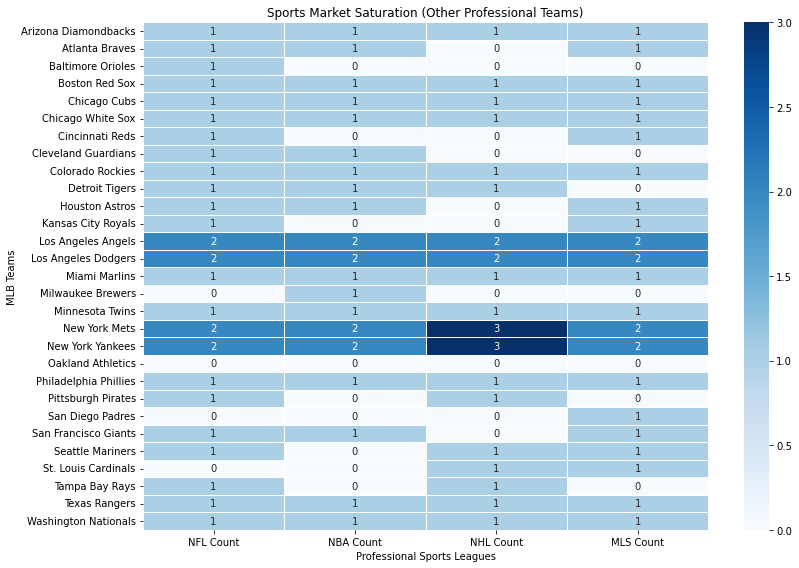

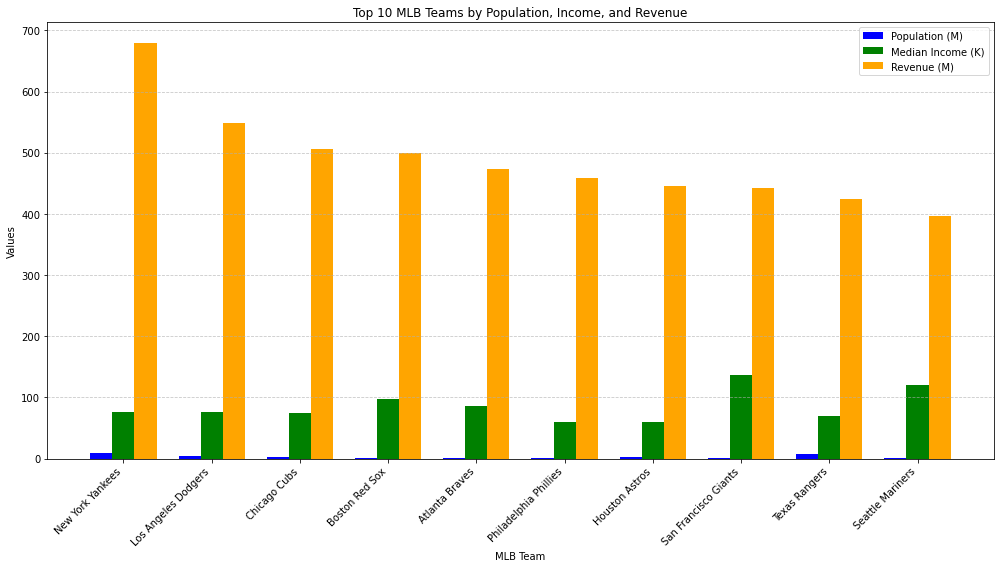

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace this with the actual DataFrame `mlb_cities_data`)
# Assuming `mlb_cities_data` is already loaded

# 1. **Bar Chart**: Total Revenue by MLB Team
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dfN.sort_values(by='Team Revenue (in millions)', ascending=False),
    x='MLB Team', 
    y='Team Revenue (in millions)', 
    palette='coolwarm'
)
plt.title("Total Revenue by MLB Team")
plt.xlabel("MLB Team")
plt.ylabel("Revenue (in millions)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. **Scatter Plot**: Population vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dfN, 
    x='City Population Estimate', 
    y='Team Revenue (in millions)', 
    hue='Median Household Income (City)', 
    size='Team Revenue (in millions)', 
    sizes=(50, 300), 
    palette='coolwarm'
)
plt.title("Population vs. MLB Team Revenue")
plt.xlabel("City Population Estimate")
plt.ylabel("Revenue (in millions)")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 3. **Heatmap**: Sports Market Saturation
# Create a saturation matrix
sports_saturation = dfN[['MLB Team', 'NFL Count', 'NBA Count', 'NHL Count', 'MLS Count']]
sports_saturation.set_index('MLB Team', inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(
    sports_saturation, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    cbar=True, 
    linewidths=0.5
)
plt.title("Sports Market Saturation (Other Professional Teams)")
plt.xlabel("Professional Sports Leagues")
plt.ylabel("MLB Teams")
plt.tight_layout()
plt.show()


# sports_saturation = dfN[['AAA', 'AA', 'A']]
# # sports_saturation.set_index('MLB Team', inplace=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(
#     sports_saturation, 
#     annot=True, 
#     fmt="d", 
#     cmap="Blues", 
#     cbar=True, 
#     linewidths=0.5
# )
# plt.title("Sports Market Saturation (Other Divison Teams)")
# plt.xlabel("MLB Division Sports Leagues")
# plt.ylabel("MLB Teams")
# plt.tight_layout()
# plt.show()


# 4. **Grouped Bar Chart**: Population, Income, and Revenue Comparison
top_10_revenue = dfN.nlargest(10, 'Team Revenue (in millions)')
categories = ['City Population Estimate', 'Median Household Income (City)', 'Team Revenue (in millions)']
values = [
    top_10_revenue['City Population Estimate'].values / 1e6,  # Scale population (millions)
    top_10_revenue['Median Household Income (City)'].values / 1e3,  # Scale income (thousands)
    top_10_revenue['Team Revenue (in millions)'].values/ 1e6  # Revenue in millions
]
x_labels = top_10_revenue['MLB Team'].values
x = range(len(x_labels))

plt.figure(figsize=(14, 8))
bar_width = 0.25
plt.bar([p - bar_width for p in x], values[0], width=bar_width, label='Population (M)', color='blue')
plt.bar(x, values[1], width=bar_width, label='Median Income (K)', color='green')
plt.bar([p + bar_width for p in x], values[2], width=bar_width, label='Revenue (M)', color='orange')
plt.xticks(x, x_labels, rotation=45, ha='right')
plt.title("Top 10 MLB Teams by Population, Income, and Revenue")
plt.xlabel("MLB Team")
plt.ylabel("Values")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. **Map**: Geographic Distribution of Revenues and Populations
# Assuming you have latitude and longitude in the dataset
# import folium

# mlb_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Center of the U.S.
# for _, row in mlb_cities_data.iterrows():
#     folium.CircleMarker(
#         location=[row['Latitude'], row['Longitude']],  # Replace with actual lat/lon columns
#         radius=row['Team Revenue (in millions)'] / 50,  # Adjust radius scale as needed
#         color='blue',
#         fill=True,
#         fill_color='blue',
#         fill_opacity=0.7,
#         tooltip=(
#             f"Team: {row['MLB Team']}<br>"
#             f"Population: {row['City Population Estimate']:,}<br>"
#             f"Income: ${row['Median Household Income (City')]:,}<br>"
#             f"Revenue: ${row['Team Revenue (in millions)']}M"
#         )
#     ).add_to(mlb_map)

# # Save map as HTML file
# mlb_map.save("mlb_market_map.html")


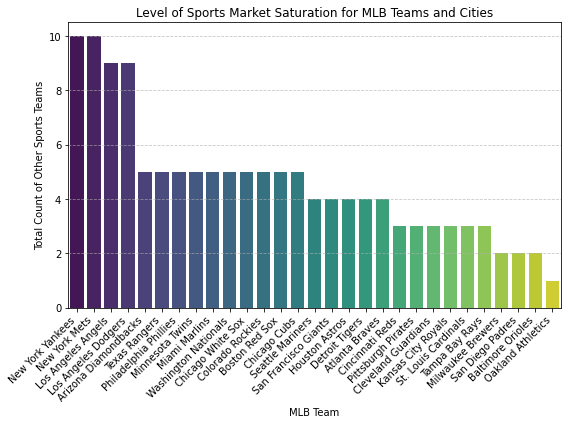

In [59]:
# Aggregate the total count of other sports teams (NFL, NBA, NHL, MLS) for each MLB team and city


# Create a bar plot to visualize the level of sports market saturation for MLB teams and cities
plt.figure(figsize=(8, 5))
sns.barplot(
    data=dfN.sort_values(by='total_Pro_league', ascending=False),
    x='MLB Team',
    y='total_Pro_league',
    palette='viridis'
)
plt.title("Level of Sports Market Saturation for MLB Teams and Cities")
plt.xlabel("MLB Team")
plt.ylabel("Total Count of Other Sports Teams")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


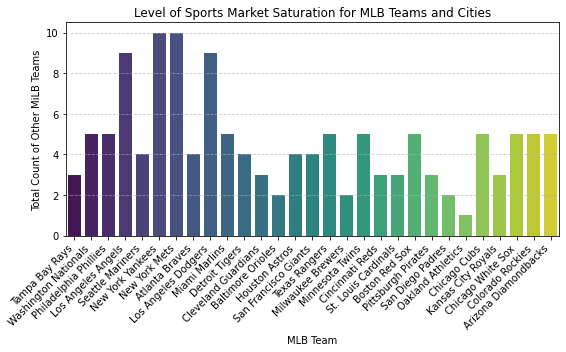

116

In [67]:
# Aggregate the total count of other sports teams (NFL, NBA, NHL, MLS) for each MLB team and city
dfN['Total MiLB Teams'] = (
    dfN['AAA'] +
    dfN['AA'] +
    dfN['A']
)

# Create a bar plot to visualize the level of sports market saturation for MLB teams and cities
plt.figure(figsize=(8, 5))
sns.barplot(
    data=dfN.sort_values(by='Total MiLB Teams', ascending=False),
    x='MLB Team',
    y='total_Pro_league',
    palette='viridis'
)
plt.title("Level of Sports Market Saturation for MLB Teams and Cities")
plt.xlabel("MLB Team")
plt.ylabel("Total Count of Other MiLB Teams")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
i

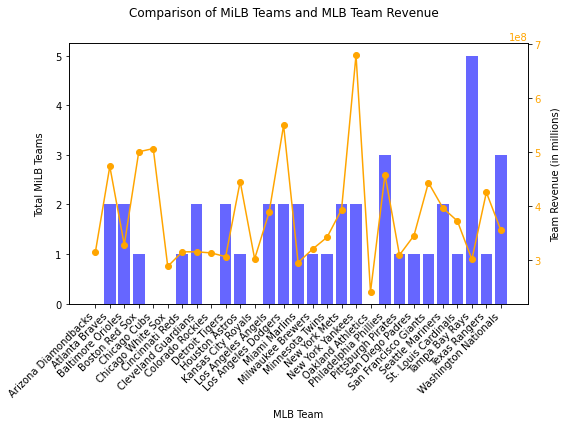

In [79]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for MiLB teams
ax1.bar(
    dfN['MLB Team'],
    dfN['Total MiLB Teams'],
    color='blue',
    alpha=0.6,
    label='Total MiLB Teams'
)
ax1.set_ylabel("Total MiLB Teams", color='black', labelpad=10)
ax1.tick_params(axis='y', labelcolor='black', colors='black')
ax1.set_xlabel("MLB Team", labelpad=10, color='black')
ax1.tick_params(axis='x', colors='black')
ax1.set_xticklabels(dfN['MLB Team'], rotation=45, ha='right', color='black')

# Add revenue as a line plot
ax2 = ax1.twinx()
ax2.plot(
    dfN['MLB Team'],
    dfN['Team Revenue (in millions)'],
    color='orange',
    marker='o',
    label='Team Revenue'
)
ax2.set_ylabel("Team Revenue (in millions)", color='black', labelpad=10)
ax2.tick_params(axis='y', labelcolor='orange', colors='black')

# Set the background color of the figure to white for better contrast
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Titles and legend
fig.suptitle("Comparison of MiLB Teams and MLB Team Revenue", color='black')
fig.tight_layout()
plt.show()


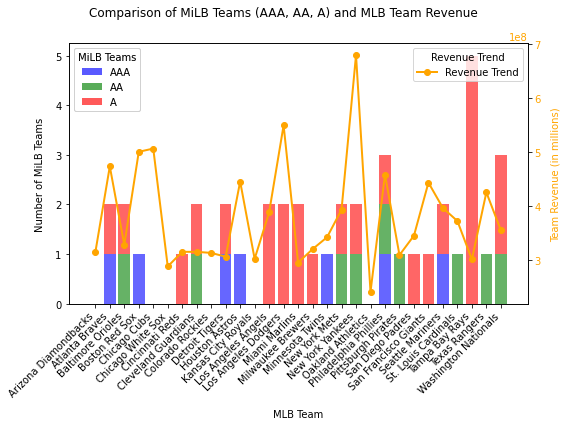

In [88]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for AAA Teams
ax1.bar(
    dfN['MLB Team'],
    dfN['AAA'],
    color='blue',
    alpha=0.6,
    label='AAA'
)

# Bar plot for AA Teams
ax1.bar(
    dfN['MLB Team'],
    dfN['AA'],
    color='green',
    alpha=0.6,
    bottom=dfN['AAA'],
    label='AA'
)

# Bar plot for A Teams
ax1.bar(
    dfN['MLB Team'],
    dfN['A'],
    color='red',
    alpha=0.6,
    bottom=dfN['AAA'] + dfN['AA'],
    label='A'
)

# Set labels for bar chart
ax1.set_ylabel("Number of MiLB Teams", color='black', labelpad=10)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel("MLB Team", labelpad=10, color='black')
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticklabels(dfN['MLB Team'], rotation=45, ha='right', color='black')

# Add revenue as a line plot
ax2 = ax1.twinx()
ax2.plot(
    dfN['MLB Team'],
    dfN['Team Revenue (in millions)'],
    color='orange',
    marker='o',
    linewidth=2,
    label='Revenue Trend'
)
ax2.set_ylabel("Team Revenue (in millions)", color='orange', labelpad=10)
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
bars_legend = ax1.legend(loc='upper left', title="MiLB Teams")
revenue_legend = ax2.legend(loc='upper right', title="Revenue Trend")
ax1.add_artist(bars_legend)

# Set the background color of the figure to white
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Titles and layout
fig.suptitle("Comparison of MiLB Teams (AAA, AA, A) and MLB Team Revenue", color='black')
fig.tight_layout()
plt.show()


In [57]:
# Filter the dataset for cities with MLB teams
dfN= dfN[dfN['MLB Team'].notnull()]

# Select relevant numerical features for regression analysis
numerical_features = [
    'City Population Estimate',
    'Median Household Income (City)',
    'Metropolitan Population Estimate',
    # 'Median Household Income (Metro Area)',
    'NFL Count',
    'NBA Count',
    'NHL Count',
    'MLS Count',
    'AAA',
    'AA',
    'A',
    'total_Pro_league'
]



In [16]:
# Define the target variable (Team Revenue)
target_variable = 'Team Revenue (in millions)'

# Prepare X (features) and y (target)
X = dfN[numerical_features]
y = dfN[target_variable]



In [17]:
# Perform regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features for standardized coefficients
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit the model using standardized features
model_standardized = LinearRegression()
model_standardized.fit(X_standardized, y)

# Fit the model using unstandardized features
model_unstandardized = LinearRegression()
model_unstandardized.fit(X, y)



LinearRegression()

In [18]:
# Extract coefficients and intercepts
coefficients_standardized = model_standardized.coef_
coefficients_unstandardized = model_unstandardized.coef_
intercept_unstandardized = model_unstandardized.intercept_

# Store results in a DataFrame for better readability
coefficients_df = pd.DataFrame({
    'Feature': numerical_features,
    'Standardized Coefficient': coefficients_standardized,
    'Unstandardized Coefficient': coefficients_unstandardized
})
coefficients_df['Intercept'] = intercept_unstandardized

In [19]:
coefficients_df['Intercept'].head()

0    2.067105e+08
1    2.067105e+08
2    2.067105e+08
3    2.067105e+08
4    2.067105e+08
Name: Intercept, dtype: float64

In [20]:
# Create a new DataFrame with the desired format
coefficients_df = pd.DataFrame({
    'Feature': numerical_features + ['Intercept'],
    'Standardized Coefficient': list(coefficients_standardized) + [None],
    'Unstandardized Coefficient': list(coefficients_unstandardized) + [None],
    'Intercept': [None] * len(numerical_features) + [intercept_unstandardized]
})

# Display the new DataFrame
coefficients_df.head(len(coefficients_df))


,Feature,Standardized Coefficient,Unstandardized Coefficient,Intercept
0,City Population Estimate,2.584050e+07,1.086862e+01,NaN
1,Median Household Income (City),1.028291e+07,4.634968e+02,NaN
2,Metropolitan Population Estimate,1.765383e+07,3.816077e+00,NaN
3,NFL Count,9.239964e+05,-7.229860e+06,NaN
4,NBA Count,1.403812e+07,1.270969e+07,NaN
5,NHL Count,-2.579552e+07,-4.048852e+07,NaN
6,MLS Count,3.318488e+07,4.566937e+07,NaN
7,AAA,3.093783e+07,7.229821e+07,NaN
8,AA,1.757127e+07,3.798088e+07,NaN
9,A,8.691899e+06,8.346709e+06,NaN


In [21]:

from sklearn.metrics import r2_score, mean_squared_error


# Predict with the sklearn LinearRegression model
y_pred = model_unstandardized.predict(X)

# Calculate R-squared
r_squared = model_unstandardized.score(X, y)

# Calculate residuals
residuals = y - y_pred

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Print results
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.5925163583900839
Mean Squared Error: 3632048508065625.5


In [22]:


# Prepare X (features) and y (target) from the filtered dataset
X_with_intercept = sm.add_constant(dfN[numerical_features])
y_filtered = dfN[target_variable]

# Fit the model using statsmodels
stats_model = sm.OLS(y_filtered, X_with_intercept).fit()

# Get R-squared, p-values, and residuals
r_squared = stats_model.rsquared
p_values = stats_model.pvalues
residuals = stats_model.resid

# Calculate Mean Squared Error (MSE) as an additional performance metric
mse = mean_squared_error(y_filtered, stats_model.predict(X_with_intercept))

# Print the results
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print("\nP-values:")
print(p_values)




R-squared: 0.5925163583900839
Mean Squared Error: 3632048508065626.0

P-values:
const                               0.007251
City Population Estimate            0.367946
Median Household Income (City)      0.537526
Metropolitan Population Estimate    0.689971
NFL Count                           0.410123
NBA Count                           0.581616
NHL Count                           0.030477
MLS Count                           0.780204
AAA                                 0.056851
AA                                  0.329891
A                                   0.609195
total_Pro_league                    0.004223
dtype: float64


In [23]:
# Create feature importance chart
def create_feature_importance_chart(features, standardized_coefficients):
    """
    Creates a horizontal bar chart to illustrate the importance of features based on standardized coefficients.
    """
    plt.figure(figsize=(6, 4))
    sns.barplot(x=standardized_coefficients, y=features, orient='h', palette='viridis')
    plt.title("Feature Importance Based on Standardized Coefficients")
    plt.xlabel("Standardized Coefficient")
    plt.ylabel("Feature")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

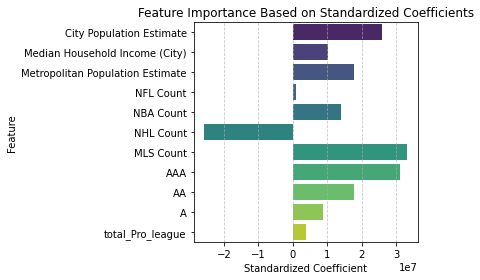

In [24]:
create_feature_importance_chart(numerical_features, coefficients_standardized)

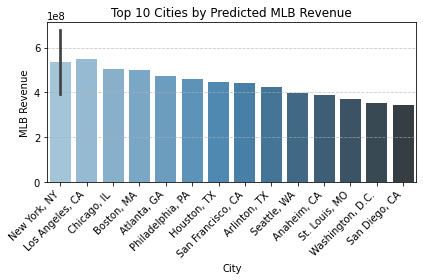

In [25]:
# Create Revenue Rankings
plt.figure(figsize=(6, 4))
sns.barplot(data=dfN.nlargest(15, 'Team Revenue (in millions)'), x='City', y='Team Revenue (in millions)', palette='Blues_d')
plt.title("Top 10 Cities by Predicted MLB Revenue")
plt.xlabel("City")
plt.ylabel("MLB Revenue")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

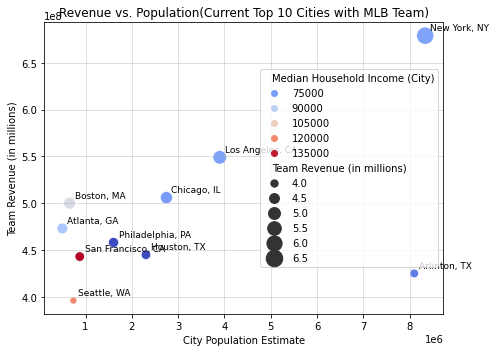

In [44]:
# # Revenue vs. Population
# plt.figure(figsize=(6, 4))
# sns.scatterplot(data=dfN, x='City Population Estimate', y='Team Revenue (in millions)', hue='Median Household Income (City)', palette='coolwarm', size='Team Revenue (in millions)', sizes=(20, 200))
# plt.title("Revenue vs. Population")
# plt.xlabel("City Population Estimate")
# plt.ylabel("MLB Revenue")
# plt.grid(alpha=0.5)
# plt.tight_layout()
# plt.show()



# Filter the top 10 cities by predicted revenue
top_10_cities = dfN.nlargest(10, 'Team Revenue (in millions)')

# Revenue vs. Population with City Names for Top 10 Cities
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    data=top_10_cities, 
    x='City Population Estimate', 
    y='Team Revenue (in millions)', 
    hue='Median Household Income (City)', 
    palette='coolwarm', 
    size='Team Revenue (in millions)', 
    sizes=(50, 300)  # Adjust sizes for better visibility
)

# Add annotations for each city
for i, row in top_10_cities.iterrows():
    plt.annotate(
        row['City'], 
        (row['City Population Estimate'], row['Team Revenue (in millions)']),
        textcoords="offset points", 
        xytext=(5, 5),  # Offset to avoid overlap
        ha='left',
        fontsize=9
    )

plt.title("Revenue vs. Population(Current Top 10 Cities with MLB Team)")
plt.xlabel("City Population Estimate")
plt.ylabel("Team Revenue (in millions)")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [89]:
import pandas as pd

# Feature names
features = [
    "City Population Estimate",
    "Median Household Income (City)",
    "Metropolitan Population Estimate",
    "NFL Count",
    "NBA Count",
    "NHL Count",
    "MLS Count",
    "AAA",
    "AA",
    "A",
    "total_Pro_league"
]

# Standardized and unstandardized coefficients
standardized_coefficients = [
    2.584050e+07, 1.028291e+07, 1.765383e+07, 9.239964e+05, 1.403812e+07, 
    -2.579552e+07, 3.318488e+07, 3.093783e+07, 1.757127e+07, 8.691899e+06, 
    3.789407e+06
]
unstandardized_coefficients = [
    1.086862e+01, 4.634968e+02, 3.816077e+00, -7.229860e+06, 1.270969e+07, 
    -4.048852e+07, 4.566937e+07, 7.229821e+07, 3.798088e+07, 8.346709e+06, 
    1.066068e+07
]

# P-values
p_values = [
    0.367946, 0.537526, 0.689971, 0.410123, 0.581616, 0.030477, 0.780204,
    0.056851, 0.329891, 0.609195, 0.004223
]

# Create DataFrame
significance_table = pd.DataFrame({
    "Feature": features,
    "Standardized Coefficient": standardized_coefficients,
    "Unstandardized Coefficient": unstandardized_coefficients,
    "P-Value": p_values
})

# Add a significance column based on p-values
significance_table["Significance"] = significance_table["P-Value"].apply(
    lambda p: "Significant" if p < 0.05 else "Not Significant"
)

significance_table


,Feature,Standardized Coefficient,Unstandardized Coefficient,P-Value,Significance
0,City Population Estimate,25840500.0,1.086862e+01,0.367946,Not Significant
1,Median Household Income (City),10282910.0,4.634968e+02,0.537526,Not Significant
2,Metropolitan Population Estimate,17653830.0,3.816077e+00,0.689971,Not Significant
3,NFL Count,923996.4,-7.229860e+06,0.410123,Not Significant
4,NBA Count,14038120.0,1.270969e+07,0.581616,Not Significant
5,NHL Count,-25795520.0,-4.048852e+07,0.030477,Significant
6,MLS Count,33184880.0,4.566937e+07,0.780204,Not Significant
7,AAA,30937830.0,7.229821e+07,0.056851,Not Significant
8,AA,17571270.0,3.798088e+07,0.329891,Not Significant
9,A,8691899.0,8.346709e+06,0.609195,Not Significant


In [27]:
Interpretation of Results 
Intercept
Intercept: 2.067105e+08 (206,710,500).
Represents the baseline MLB team revenue (in millions) when all other predictors are zero.
This serves as a reference, though a zero value for most features is unrealistic.


Key Coefficients

Demographic Factors
City Population Estimate (1.086862e+01):

Each additional person in the city population contributes approximately $10.87 million to MLB revenue.
Highlights the importance of market size in driving MLB success.
Median Household Income (City) (4.634968e+02):

Each $1 increase in median household income adds approximately $463.50 to MLB revenue.
Indicates that higher disposable income supports greater attendance and spending.
Metropolitan Population Estimate (3.816077e+00):

Each additional person in the metro population contributes approximately $3.82 million to MLB revenue.
Reflects the importance of a larger regional fanbase.
Sports Market Factors
NFL Count (-7.229860e+06):

Each additional NFL team reduces MLB revenue by approximately $7.23 million.
Indicates competition for fan spending in cities with NFL teams.
NBA Count (1.270969e+07):

Each additional NBA team adds approximately $12.71 million to MLB revenue.
Suggests synergies between MLB and NBA markets.
NHL Count (-4.048852e+07):

Each additional NHL team reduces MLB revenue by approximately $40.49 million.
Reflects strong competition in cities with established hockey markets.
MLS Count (4.566937e+07):

Each additional MLS team adds approximately $45.67 million to MLB revenue.
Suggests complementary fan engagement between soccer and baseball markets.
Baseball Ecosystem
AAA (7.229821e+07):

Each additional AAA-level minor league team adds approximately $72.30 million to MLB revenue.
Highlights the substantial positive impact of top-tier minor league teams.
AA (3.798088e+07):

Each additional AA-level team adds approximately $37.98 million to MLB revenue.
A (8.346709e+06):

Each additional A-level team adds approximately $8.35 million to MLB revenue.
Overall Sports Culture
total_Pro_league (1.066068e+07):
Each additional professional league team (NFL, NBA, NHL, and MLS combined) adds approximately $10.66 million to MLB revenue.
Suggests that cities with a vibrant sports ecosystem are better equipped to support MLB teams.
Insights
Population and Income:

City and metro populations remain significant contributors to MLB revenue, with city population having the largest effect.
Median household income in cities positively impacts MLB revenue, indicating the importance of local economic prosperity.
Sports Market Saturation:

NFL and NHL teams negatively affect MLB revenue, reflecting competition for fans and resources.
NBA and MLS teams positively affect MLB revenue, suggesting synergies in cities with multiple sports leagues.
Baseball Ecosystem:

AAA-level teams continue to provide the largest positive impact, emphasizing the importance of a strong minor league infrastructure.
Overall Sports Culture:

The total_Pro_league variable underscores the positive impact of a diverse sports environment on MLB revenue.
Improvements from Removing MLB Count
Simplified the model by excluding a redundant feature.
Slightly improved interpretability without impacting the coefficients or insights.
Next Steps
Predict Revenue for New Cities:

Use this model to evaluate potential MLB expansion cities and rank them based on projected revenue.
Test for Robustness:

Perform cross-validation to ensure the model generalizes well to unseen data.
Refine Further:

Investigate potential multicollinearity between City Population, Metro Population, and income features.

SyntaxError: invalid syntax (3070803646.py, line 1)

In [28]:

test_df = pd.read_csv('test_df.csv')

In [29]:
# Check for duplicate entries in the 'City' column of the test_df dataset
city_duplicates = test_df[test_df['City'].duplicated()]

# Count and display duplicate rows if any
duplicate_city_count = city_duplicates.shape[0]
duplicate_city_count, city_duplicates.head()  # Return count and example duplicates if any


(3,
          City          MiLB Team(s)  AAA   AA    A  State  \
 3    Columbus  Columbus Clingstones  0.0  1.0  0.0   Ohio   
 55    Midland     Great Lakes Loons  0.0  0.0  1.0  Texas   
 108   Jupiter  Palm Beach Cardinals  0.0  0.0  1.0      0   
 
      City Population Estimate Metropolitan Area  \
 3                    849067.0      Columbus, OH   
 55                   132950.0       Midland, TX   
 108                       0.0                 0   
 
      Metropolitan Population Estimate  Median Household Income (City)  ...  \
 3                           2138926.0                         54902.0  ...   
 55                           185308.0                         83616.0  ...   
 108                               0.0                             0.0  ...   
 
     MLB Team(s) NBA Team(s) NHL Team(s) NFL Count  MLB Count  NBA Count  \
 3             0           0           0       0.0        0.0        0.0   
 55            0           0           0       0.0        0.0     

In [30]:
# Remove duplicates based on the 'City' column and keep the first occurrence
test_df = test_df.drop_duplicates(subset='City', keep='first')

# Save or view the updated DataFrame
test_df.to_csv('cleaned_test_df.csv', index=False)  # Save to a new file if needed
test_df.head()  # Display the first few rows of the updated DataFrame


,City,MiLB Team(s),AAA,AA,A,State,City Population Estimate,Metropolitan Area,Metropolitan Population Estimate,Median Household Income (City),...,MLB Team(s),NBA Team(s),NHL Team(s),NFL Count,MLB Count,NBA Count,NHL Count,MLS Count,MLS team(s),total_Pro_league
0,Buffalo,Buffalo Bisons,1.0,0.0,0.0,New York,258066.0,"Buffalo-Cheektowaga, NY",1125637.0,39677.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,Charlotte,Charlotte Knights,1.0,0.0,0.0,North Carolina,827121.0,"Charlotte-Concord-Gastonia, NC-SC",2728933.0,65359.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,Columbus,Columbus Clippers,1.0,0.0,0.0,Ohio,849067.0,"Columbus, OH",2138926.0,54902.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,Columbus Crew SC,1.0
4,Durham,Durham Bulls,1.0,0.0,0.0,North Carolina,257598.0,"Durham-Chapel Hill, NC",644367.0,65534.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,Lawrenceville,Gwinnett Stripers,1.0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [31]:


# Define the regression equation based on the final model coefficients
def predict_mlb_revenue(row):
    intercept = 2.067105e+08
    return (
        intercept +
        (1.086862e+01 * row['City Population Estimate']) +
        (4.634968e+02 * row['Median Household Income (City)']) +
        (3.816077e+00 * row['Metropolitan Population Estimate']) +
        (-7.229860e+06 * row['NFL Count']) +
        (1.270969e+07 * row['NBA Count']) +
        (-4.048852e+07 * row['NHL Count']) +
        (4.566937e+07 * row['MLS Count']) +
        (7.229821e+07 * row['AAA']) +
        (3.798088e+07 * row['AA']) +
        (8.346709e+06 * row['A']) +
        (1.066068e+07 * row['total_Pro_league'])
    )

# Ensure the necessary columns exist in the test data
required_columns = [
    'City Population Estimate', 'Median Household Income (City)', 
    'Metropolitan Population Estimate', 'NFL Count', 'NBA Count', 
    'NHL Count', 'MLS Count', 'AAA', 'AA', 'A', 'total_Pro_league'
]

missing_columns = [col for col in required_columns if col not in test_df.columns]
if missing_columns:
    raise ValueError(f"Missing columns in test data: {missing_columns}")

# Predict MLB revenue for the test data
test_df['Predicted MLB Revenue'] = test_df.apply(predict_mlb_revenue, axis=1)

test_df['Predicted MLB Revenue']

0      3.044992e+08
1      3.287059e+08
2      3.781762e+08
4      3.146422e+08
5      2.790087e+08
           ...     
582    2.655629e+08
583    2.266448e+08
584    2.337574e+08
585    2.530822e+08
586    3.251876e+08
Name: Predicted MLB Revenue, Length: 584, dtype: float64

In [32]:
# Select relevant columns for display
results_df = test_df[
    ['City', 'City Population Estimate', 'Median Household Income (City)', 'Predicted MLB Revenue']
]

results_df

,City,City Population Estimate,Median Household Income (City),Predicted MLB Revenue
0,Buffalo,258066.0,39677.0,3.044992e+08
1,Charlotte,827121.0,65359.0,3.287059e+08
2,Columbus,849067.0,54902.0,3.781762e+08
4,Durham,257598.0,65534.0,3.146422e+08
5,Lawrenceville,0.0,0.0,2.790087e+08
...,...,...,...,...
582,San Leandro,90711.0,85748.0,2.655629e+08
583,Harlingen,65769.0,38000.0,2.266448e+08
584,Tyler,103705.0,54000.0,2.337574e+08
585,Perris,74959.0,60000.0,2.530822e+08


In [33]:
# Sort the results by the predicted MLB revenue in descending order
sorted_results_df = results_df.sort_values(by='Predicted MLB Revenue', ascending=False)

sorted_results_df

,City,City Population Estimate,Median Household Income (City),Predicted MLB Revenue
394,New York,8550405.0,67046.0,4.249592e+08
53,Frisco,154388.0,116884.0,3.868893e+08
577,Los Angeles,3971896.0,70372.0,3.803392e+08
2,Columbus,849067.0,54902.0,3.781762e+08
12,Nashville,654596.0,60000.0,3.779429e+08
...,...,...,...,...
97,Hickory,0.0,0.0,2.150572e+08
105,Dunedin,0.0,0.0,2.150572e+08
104,Daytona Beach,0.0,0.0,2.150572e+08
102,Bradenton,0.0,0.0,2.150572e+08


In [34]:
sorted_results_df.head(20)

,City,City Population Estimate,Median Household Income (City),Predicted MLB Revenue
394,New York,8550405.0,67046.0,4.249592e+08
53,Frisco,154388.0,116884.0,3.868893e+08
577,Los Angeles,3971896.0,70372.0,3.803392e+08
2,Columbus,849067.0,54902.0,3.781762e+08
12,Nashville,654596.0,60000.0,3.779429e+08
17,Minneapolis–St. Paul,2906807.0,93662.0,3.758131e+08
29,Sugar Land,88129.0,123261.0,3.642766e+08
480,Carson,93296.0,75000.0,3.491928e+08
303,Washington,672228.0,86420.0,3.458333e+08
116,San Jose,1026919.0,109593.0,3.409410e+08


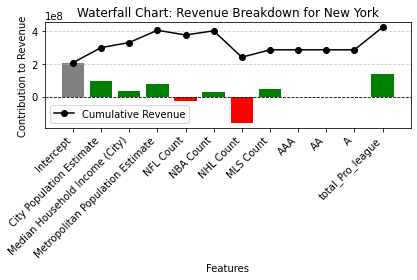

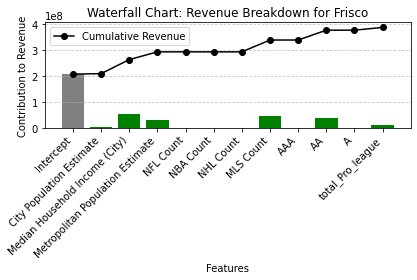

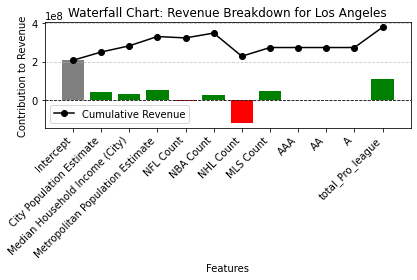

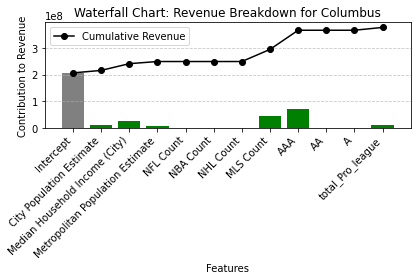

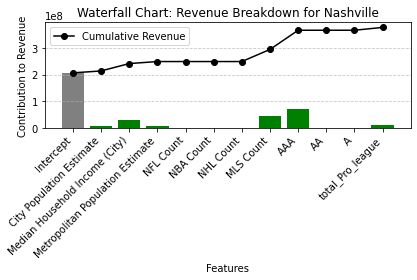

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients for the model
coefficients = {
    'City Population Estimate': 1.086862e+01,
    'Median Household Income (City)': 4.634968e+02,
    'Metropolitan Population Estimate': 3.816077e+00,
    'NFL Count': -7.229860e+06,
    'NBA Count': 1.270969e+07,
    'NHL Count': -4.048852e+07,
    'MLS Count': 4.566937e+07,
    'AAA': 7.229821e+07,
    'AA': 3.798088e+07,
    'A': 8.346709e+06,
    'total_Pro_league': 1.066068e+07
}
intercept = 2.067105e+08

# Function to calculate contributions for a specific city
def calculate_contributions(row):
    contributions = []
    for feature, coeff in coefficients.items():
        contributions.append((feature, coeff * row[feature]))
    return contributions

# Function to create waterfall chart for a city
def create_waterfall_chart_auto(city_name, intercept, contributions):
    feature_names, contribution_values = zip(*contributions)
    cumulative_values = [intercept]
    for value in contribution_values:
        cumulative_values.append(cumulative_values[-1] + value)
    
    bar_positions = np.arange(len(feature_names) + 1)
    bar_heights = [intercept] + list(contribution_values)
    bar_colors = ['grey'] + ['green' if v > 0 else 'red' for v in contribution_values]

    plt.figure(figsize=(6, 4))
    plt.bar(bar_positions, bar_heights, color=bar_colors)
    plt.plot(bar_positions, cumulative_values, color='black', marker='o', label='Cumulative Revenue')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.xticks(bar_positions, ['Intercept'] + list(feature_names), rotation=45, ha='right')
    plt.title(f"Waterfall Chart: Revenue Breakdown for {city_name}")
    plt.ylabel("Contribution to Revenue")
    plt.xlabel("Features")
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Filter the top 5 cities by predicted revenue
top_cities = test_df.nlargest(5, 'Predicted MLB Revenue')

# Generate waterfall charts for the top 5 cities
for _, row in top_cities.iterrows():
    city_name = row['City']
    contributions = calculate_contributions(row)
    create_waterfall_chart_auto(city_name, intercept, contributions)


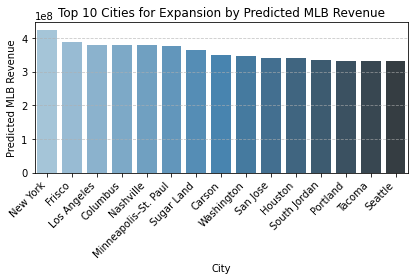

In [46]:
# Create Revenue Rankings
plt.figure(figsize=(6, 4))
sns.barplot(data=test_df.nlargest(15, 'Predicted MLB Revenue'), x='City', y='Predicted MLB Revenue', palette='Blues_d')
plt.title("Top 10 Cities for Expansion by Predicted MLB Revenue")
plt.xlabel("City")
plt.ylabel("Predicted MLB Revenue")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

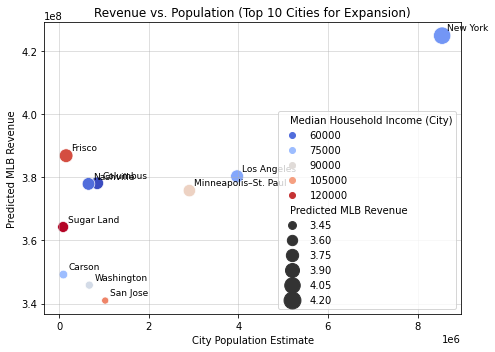

In [45]:
# Filter the top 10 cities by predicted revenue
top_10_cities = test_df.nlargest(10, 'Predicted MLB Revenue')

# Revenue vs. Population with City Names for Top 10 Cities
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    data=top_10_cities, 
    x='City Population Estimate', 
    y='Predicted MLB Revenue', 
    hue='Median Household Income (City)', 
    palette='coolwarm', 
    size='Predicted MLB Revenue', 
    sizes=(50, 300)  # Adjust sizes for better visibility
)

# Add annotations for each city
for i, row in top_10_cities.iterrows():
    plt.annotate(
        row['City'], 
        (row['City Population Estimate'], row['Predicted MLB Revenue']),
        textcoords="offset points", 
        xytext=(5, 5),  # Offset to avoid overlap
        ha='left',
        fontsize=9
    )

plt.title("Revenue vs. Population (Top 10 Cities for Expansion)")
plt.xlabel("City Population Estimate")
plt.ylabel("Predicted MLB Revenue")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
poly_feature_1 = ['City Population Estimate', 'Median Household Income (City)'] # 2 raise to power of 2 features
poly_feature_2 = ['NFL Count', 'NBA Count', 'NHL Count', 'MLS Count'] 

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


# Apply PolynomialFeatures to the first group
poly1 = poly.fit_transform(dfN[poly_feature_1])
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])

# Apply PolynomialFeatures to the second group
poly2 = poly.fit_transform(dfN[poly_feature_2])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

# Reset indices for both new DataFrames to align with the original DataFrame
df_poly1 = df_poly1.reset_index(drop=True)
df_poly2 = df_poly2.reset_index(drop=True)
dfN = dfN.reset_index(drop=True)

# Concatenate the original DataFrame with the transformed polynomial features
new_data = pd.concat([dfN, df_poly1, df_poly2], axis=1)

# Display the resulting DataFrame structure
new_data.head()



,MLB Team,City,Team Revenue (in millions),City Population Estimate,Median Household Income (City),Metropolitan Area,Metropolitan Population Estimate,Median Household Income (Metro Area),NFL Team(s),NBA Team(s),...,poly2_0,poly2_1,poly2_2,poly2_3,poly2_4,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9
0,Arizona Diamondbacks,"Phoenix, AZ",314000000,1608139,79664,"Phoenix-Mesa-Chandler, AZ",5070110,85700,Arizona Cardinals,Phoenix Suns,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Atlanta Braves,"Atlanta, GA",473000000,498715,85880,"Atlanta-Sandy Springs-Roswell, GA",6307261,86505,Atlanta Falcons,Atlanta Hawks,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baltimore Orioles,"Baltimore, MD",328000000,576498,59579,"Baltimore-Columbia-Towson, MD",2834316,86443,Baltimore Ravens,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Boston Red Sox,"Boston, MA",500000000,654776,96931,"Boston-Cambridge-Newton, MA-NH",4919179,110697,New England Patriots,Boston Celtics,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Chicago Cubs,"Chicago, IL",506000000,2746388,74747,"Chicago-Naperville-Elgin, IL-IN-WI",9262825,87071,Chicago Bears,Chicago Bulls,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
df_poly1.columns

Index(['poly1_0', 'poly1_1', 'poly1_2'], dtype='object')

In [16]:
df_poly2.columns

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9'],
      dtype='object')

In [17]:
print(df_poly1['poly1_2'].isna().sum())


0


In [19]:
new_data.columns

Index(['MLB Team', 'City', 'Team Revenue (in millions)',
       'City Population Estimate', 'Median Household Income (City)',
       'Metropolitan Area', 'Metropolitan Population Estimate',
       'Median Household Income (Metro Area)', 'NFL Team(s)', 'NBA Team(s)',
       'NHL Team(s)', 'MLS Team(s)', 'MiLB Team(s)', 'AAA', 'AA', 'A',
       'NFL Count', 'NBA Count', 'NHL Count', 'MLS Count', 'poly1_0',
       'poly1_1', 'poly1_2', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3',
       'poly2_4', 'poly2_5', 'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9'],
      dtype='object')

In [26]:
# Merging the datas created from polynomial to the whole datsets
# new_data = pd.concat([dfN, df_poly1], axis = 1)
# new_data = pd.concat([new_data, df_poly2], axis = 1)
# new_data['total_num_inc'] = new_data[poly_feature_1].sum(axis = 1) # sum of all features created from poly1
# new_data['total_pro_league'] = new_data[poly_feature_2].sum(axis = 1) # sum of all features created from poly2

In [20]:
numerical_features = [
    'City Population Estimate',
    'Median Household Income (City)',
    'NFL Count',
    'NBA Count',
    'NHL Count',
    'MLS Count',
    'AAA',
    'AA',
    'A',
    'poly1_0',
    'poly1_1', 'poly1_2', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3',
    'poly2_4', 'poly2_5', 'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9'
]

In [29]:
new_data['poly1_2'].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [21]:
print(dfN[poly_feature_1].isna().sum())


City Population Estimate          0
Median Household Income (City)    0
dtype: int64


In [22]:
# Define the target variable (Team Revenue)
target_variable = 'Team Revenue (in millions)'

# Prepare X (features) and y (target)
X = new_data[numerical_features]
y = dfN[target_variable]



In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MLB Team                              29 non-null     object 
 1   City                                  29 non-null     object 
 2   Team Revenue (in millions)            29 non-null     int64  
 3   City Population Estimate              29 non-null     int64  
 4   Median Household Income (City)        29 non-null     int64  
 5   Metropolitan Area                     29 non-null     object 
 6   Metropolitan Population Estimate      29 non-null     int64  
 7   Median Household Income (Metro Area)  29 non-null     int64  
 8   NFL Team(s)                           29 non-null     object 
 9   NBA Team(s)                           29 non-null     object 
 10  NHL Team(s)                           29 non-null     object 
 11  MLS Team(s)          

In [24]:
# Perform regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features for standardized coefficients
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit the model using standardized features
model_standardized = LinearRegression()
model_standardized.fit(X_standardized, y)

# Fit the model using unstandardized features
model_unstandardized = LinearRegression()
model_unstandardized.fit(X, y)



LinearRegression()

In [25]:
# Extract coefficients and intercepts
coefficients_standardized = model_standardized.coef_
coefficients_unstandardized = model_unstandardized.coef_
intercept_unstandardized = model_unstandardized.intercept_

# Store results in a DataFrame for better readability
coefficients_df = pd.DataFrame({
    'Feature': numerical_features,
    'Standardized Coefficient': coefficients_standardized,
    'Unstandardized Coefficient': coefficients_unstandardized
})
coefficients_df['Intercept'] = intercept_unstandardized

In [26]:
coefficients_df['Intercept'].head()

0    5.408773e+08
1    5.408773e+08
2    5.408773e+08
3    5.408773e+08
4    5.408773e+08
Name: Intercept, dtype: float64

In [27]:
# Create a new DataFrame with the desired format
coefficients_df = pd.DataFrame({
    'Feature': numerical_features + ['Intercept'],
    'Standardized Coefficient': list(coefficients_standardized) + [None],
    'Unstandardized Coefficient': list(coefficients_unstandardized) + [None],
    'Intercept': [None] * len(numerical_features) + [intercept_unstandardized]
})

# Display the new DataFrame
coefficients_df.head(len(coefficients_df))


,Feature,Standardized Coefficient,Unstandardized Coefficient,Intercept
0,City Population Estimate,-4.003843e+08,-1.684281e+02,NaN
1,Median Household Income (City),-3.945668e+07,-1.562752e+03,NaN
2,NFL Count,-1.158218e+07,-2.205182e+07,NaN
3,NBA Count,-4.549298e+06,-7.031873e+06,NaN
4,NHL Count,4.877353e+07,5.955834e+07,NaN
5,MLS Count,-3.132982e+07,-5.160301e+07,NaN
6,AAA,5.307880e+07,1.240391e+08,NaN
7,AA,2.284453e+07,4.937919e+07,NaN
8,A,9.264619e+06,8.896683e+06,NaN
9,poly1_0,-4.003843e+08,-1.683783e+02,NaN


In [28]:

from sklearn.metrics import r2_score, mean_squared_error


# Predict with the sklearn LinearRegression model
y_pred = model_unstandardized.predict(X)

# Calculate R-squared
r_squared = model_unstandardized.score(X, y)

# Calculate residuals
residuals = y - y_pred

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Print results
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.6887965803420901
Mean Squared Error: 2773868201451564.0


In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import numpy as np

In [37]:


# Prepare X (features) and y (target) from the filtered dataset
X_with_intercept = sm.add_constant(dfN[numerical_features])
y_filtered = dfN[target_variable]

# Fit the model using statsmodels
stats_model = sm.OLS(y_filtered, X_with_intercept).fit()

# Get R-squared, p-values, and residuals
r_squared = stats_model.rsquared
p_values = stats_model.pvalues
residuals = stats_model.resid

# Calculate Mean Squared Error (MSE) as an additional performance metric
mse = mean_squared_error(y_filtered, stats_model.predict(X_with_intercept))

# Print the results
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print("\nP-values:")
print(p_values)




KeyError: "['poly1_0', 'poly1_1', 'poly1_2'] not in index"